In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from  PyAstronomy.pyasl import crosscorrRV
from astropy.io import fits

In [7]:
wvnum, wvlen, crf, tel, c, n = np.genfromtxt("C:/Users/Jude/TheCannonResearch/Atlases/solarAtlas.txt",skip_header=1,unpack=True)

In [12]:
fitsfile = fits.open('C:/Users/Jude/TheCannonResearch/HIRESspectra/r20040821.211.fits')
flux = fitsfile[0].data
wv = []
for w in np.arange(3362,8099.07363,0.073631): 
    wv.append(w)

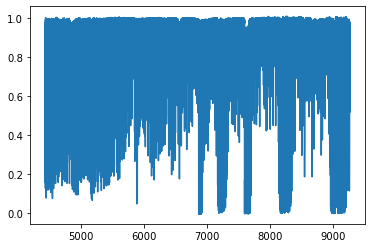

In [8]:
start = 0
stop = len(wvlen)-1
plt.plot(wvlen[start:stop],c[start:stop])

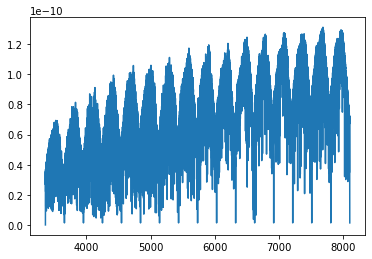

In [21]:
allfluxTogether = []
for arr in flux:
    for pixel in arr: 
        allfluxTogether.append(pixel*1.40e-15)  #This 1.40e-15 is some guess for the conversion from 
                                                #counts to ergs/sec
    
plt.plot(wv,allfluxTogether)
plt.show()

In [34]:
#Cross-corelate 
#The reason I applied the [15000:] to the HIRES spectra here 
#is because the solar spectra's wavelength doesn't go that small. 
#Thus it threw an error
rv, cc = crosscorrRV(wv[15000:], allfluxTogether[15000:], wvlen, crf, -19., 19., 19./50., skipedge=3)

PyAValError: 
---------------------
A PyA error occurred:
---------------------
Type of error: PyA Value Error
What happened?
    The minimum wavelength is not covered by the template for all indicated RV shifts.
Where did it happen?
    crosscorrRV
What are possible solutions?
  - Provide a larger template
  - Try to use skipedge


In [35]:
min(wv[15000:])

4466.465000003074

In [36]:
min(wvlen)

4442.9976